# AST 7939 Homework Assignment #4 (10 pts)

## All work is due Wednesday March 22 at 5 pm.

## Instruction: 
Do all homework in this Jupyter notebook and submit your final .ipynb file via Canvas. Show ALL your work and try to add comment lines as needed to describe what your code does. 

You are encouraged to discuss homework problems with your classmates. However, your python script and answers to the questions must be written by yourself.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import gridspec
from sklearn.model_selection import train_test_split
import time
from sklearn.decomposition import PCA

### 1. Clustering (4 pts)

In this homework problem, we will use DBSCAN to cluster stars in the Orion complex, inspired by [Chen et al. (2020)]( https://ui.adsabs.harvard.edu/abs/2020A%26A...643A.114C/abstract). In that paper, the authors used Shared Nearest Neighbor (SNN), a modified version of DBSCAN, which we did not cover during this course. We will use DBSCAN instead. We will use the same Gaia data set which the authors made publicly available on this Github repository: https://github.com/BoquanErwinChen/GaiaDR2_Orion_Dissection. You can find the data file in the HiPerGator class share folder as well as on Canvas.

### Let's read in the Gaia data.

In [2]:
import pandas as pd

filename = "/mnt/c/Users/panda/Documents/hwData/Orion_data_20190924.csv"
df = pd.read_csv(filename)
df.dropna(subset=['ra', 'dec', 'parallax', 'pmra', 'pmdec'])
df = df.reset_index(drop=True)

In [3]:
df

,ra,ra_error,dec,dec_error,source_id,parallax,parallax_error,pmra,pmra_error,pmdec,...,phot_rp_mean_mag,bp_rp,radial_velocity,radial_velocity_error,teff_val,a_g_val,e_bp_min_rp_val,radius_val,lum_val,ruwe
0,75.254413,0.191960,-3.397018,0.139120,3213149215497176960,2.794918,0.212409,-2.617536,0.408962,1.669195,...,17.211597,2.672356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.909273
1,75.561670,0.234429,-4.866204,0.206860,3212376190103379584,3.165823,0.280067,-2.495638,0.511235,0.305570,...,17.622894,2.886185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.033360
2,75.052364,0.067621,-3.386506,0.052373,3213160421067816320,2.819880,0.073171,3.840388,0.135597,0.344070,...,15.534090,2.050842,NaN,NaN,3860.6667,0.2240,0.1140,NaN,NaN,1.001610
3,75.021177,0.103251,-4.005701,0.078453,3212679487809861248,2.669342,0.123817,0.160382,0.229156,-0.794245,...,15.949252,3.309411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.957134
4,75.179643,0.030784,-6.085392,0.026767,3211380620978873344,3.635541,0.038434,-1.479837,0.063476,-1.582998,...,9.450638,0.358518,NaN,NaN,8049.0000,0.5495,0.3030,NaN,NaN,1.243121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29025,89.445830,0.194402,6.615502,0.185320,3321921839250935424,2.963123,0.234839,3.694528,0.367675,-2.861006,...,16.974401,2.873224,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022000
29026,89.129035,0.025935,6.574493,0.026383,3322578251987928576,2.348265,0.031663,-2.595891,0.048980,-1.927499,...,13.123673,1.322178,NaN,NaN,4863.4053,0.8170,0.4082,0.937234,0.442744,1.047600
29027,89.368736,0.152991,6.784836,0.146842,3322675691910202368,4.136481,0.186160,-3.831424,0.303003,-2.835496,...,16.644974,2.890482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.997614
29028,89.196556,0.030407,6.698468,0.028375,3322676074163325952,2.695094,0.032618,-3.342518,0.061107,-3.943541,...,14.011317,1.566079,NaN,NaN,4465.4100,0.6405,0.3232,0.659014,0.155571,1.015678


In [4]:
df.keys()

Index(['ra', 'ra_error', 'dec', 'dec_error', 'source_id', 'parallax',
       'parallax_error', 'pmra', 'pmra_error', 'pmdec', 'pmdec_error',
       'dec_parallax_corr', 'dec_pmdec_corr', 'dec_pmra_corr',
       'parallax_pmdec_corr', 'parallax_pmra_corr', 'pmra_pmdec_corr',
       'ra_dec_corr', 'ra_parallax_corr', 'ra_pmra_corr', 'ra_pmdec_corr',
       'duplicated_source', 'phot_g_mean_flux', 'phot_g_mean_flux_error',
       'phot_g_mean_mag', 'phot_bp_mean_flux', 'phot_bp_mean_flux_error',
       'phot_bp_mean_mag', 'phot_rp_mean_flux', 'phot_rp_mean_flux_error',
       'phot_rp_mean_mag', 'bp_rp', 'radial_velocity', 'radial_velocity_error',
       'teff_val', 'a_g_val', 'e_bp_min_rp_val', 'radius_val', 'lum_val',
       'ruwe'],
      dtype='object')

### Spatial distribution of the stars on the sky

Text(0, 0.5, 'Dec (deg)')

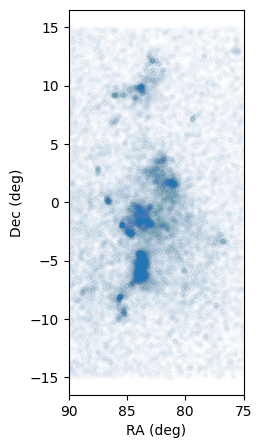

In [5]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5,5))

ax.plot(df.ra, df.dec, '.', alpha=0.01)
ax.set_xlim(90,75)
ax.set_aspect('equal')
ax.set_xlabel('RA (deg)')
ax.set_ylabel('Dec (deg)')


For DBSCAN, there are two hyperparameters to optimize: epsilon & min_samples. We should explore a grid of models to optimize the hyperparameters, but for the sake of computing time let's fix min_samples = 10 and try to find a "good" epsilon value. To do so, let's adopt what has been done in [Castro-Ginard et al. (2018)]( https://ui.adsabs.harvard.edu/abs/2018A%26A...618A..59C/abstract). See their Section 2.2 and Figure 3. To briefly summarize, we generate a random sample having the same number of stars to our dataset (i.e., 29,030), where the features are drawn "randomly". The idea is that, if the stars are all "field stars", not cluster stars, then the distribution of each astrometric parameter would follow normal distribution and would be different from that of cluster stars.

(a) Among various parameters in the data file, we will use RA, Dec, parallax, RA proper motions RA (pmra), Dec proper motions (pmdec). Make an array containing this information. 

Then, generate a new random sample of the same number of stars to the original data, according to the distribution of each astrometric parameter estimated using a Gaussian kernel density estimator. In other words, compute the mean and standard deviation of each of the astrometric parameter of the original data, and generate a random sample which follows a normal (Gaussian) distribution having the computed mean and standard deviation. You can use ```numpy.random.normal``` for this. 

DBSCAN requires feature scaling, so apply feature scaling for the two samples (individually). (1 pt) 

In [6]:
# using DBCAN, clustering algorithm
# hyperparameters to optimize
# only need to find what epsilon to use
# see what paper did, using GAIA to find open clusters
# Fig. 3 histogram

# if you compute mean and std of the Orion data and an evenly spread field of stars following gaussian distrobution 
# for clusters, distance to nearest neighbor will be very small 
# make a plot like histogram
# based on histogram, choose a histogram
# make DBSCAN model, identify clusters? 

def get_distro(lis): # makes a gaussian distribution given a list
    mean = np.mean(lis)
    std = np.std(lis)
    size = np.array(lis).size
    return np.random.normal(loc=mean, scale=std, size=size)

def get_new_random_sample(df): # makes a random sample based on a dataframe
    new_random_ra = get_distro(np.array(df['ra']))
    new_random_dec = get_distro(np.array(df['dec']))
    new_random_parallax = get_distro(np.array(df['parallax']))
    new_random_pmra = get_distro(np.array(df['pmra']))
    new_random_pmdec = get_distro(np.array(df['pmdec']))
    
    new_random_sample = np.array([new_random_ra, new_random_dec, new_random_parallax, new_random_pmra, new_random_pmdec]).T
    return new_random_sample

feature_names = ['ra', 'dec', 'parallax', 'pmra', 'pmdec']
X = np.array(df[feature_names])

new_random_sample = get_new_random_sample(df)


print(X.shape, new_random_sample.shape)

X_scaled = StandardScaler().fit(X).transform(X)
new_random_sample_scaled = StandardScaler().fit(new_random_sample).transform(new_random_sample)

(29030, 5) (29030, 5)


(b) For the two samples, compute the distance to the 10th nearest neighbor for each data point (hint: use ```sklearn.neighbors.NearestNeighbors```). Then, make histograms showing the distance to the 10th nearest neighbor. Your plot should look similar to Figure 3 of [Castro-Ginard et al. (2018)]( https://ui.adsabs.harvard.edu/abs/2018A%26A...618A..59C/abstract). If you want to do a statistically more rigorous job, you can draw many random samples (say 100) and take an average of the bootstrapped samples. (1 pt)


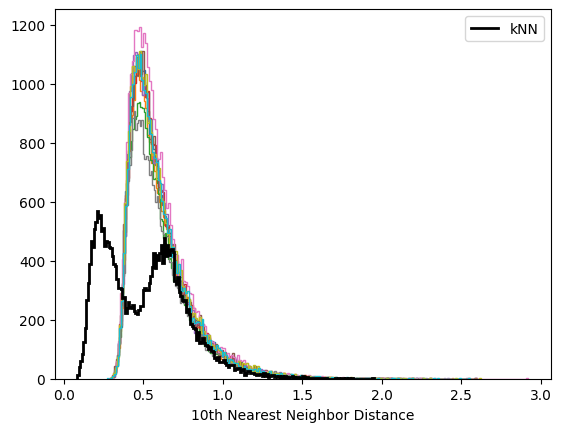

In [8]:
def plot_10th_dist(lis, **kwargs): # plots the histogram distribution of counts for each distance bin
    kNN = NearestNeighbors(n_neighbors=10)
    kNN.fit(lis)
    neigh_dist, neigh_ind = kNN.kneighbors(lis, 10)
    nearesth_tenth = neigh_dist[:, -1]
    bins = np.linspace(np.min(nearesth_tenth), np.max(nearesth_tenth), num=200)
    counts, bins = np.histogram(nearesth_tenth, bins=bins)
    plt.stairs(counts, bins, **kwargs)
    return np.min(nearesth_tenth)
    
eps_rand = np.zeros(10) 

for i in range(eps_rand.size): # make X new random samples and plot them
    new_random_sample = get_new_random_sample(df)
    new_random_sample_scaled = StandardScaler().fit(new_random_sample).transform(new_random_sample)
    eps_rand[i] = plot_10th_dist(new_random_sample_scaled)

eps_kNN = plot_10th_dist(X_scaled, color='k', linewidth=2, label='kNN')

plt.xlabel('10th Nearest Neighbor Distance')
plt.legend()

(c) Based on the histograms you made in (b), what do you think a reasonable epsilon value? Justify your choice. (1 pt)

In [9]:
eps = np.mean([np.mean(eps_rand), eps_kNN])
eps

0.1876329249836128

The reasonable value of epislon should be the mean of the minimum 10th nearest neighbor distance for the random samples and the observed distribution. This should find the most concentrated stars, which are the most likely candidates to be in an open cluster.

(d) Using the epsilon you choosed from (c) and min_samples=10, make a DBSCAN model. How many clusters did you find?, and how many menbers do each clusters have? Make a figure showing the distribution of identified clusters. Your figure should look similar to Figure 2 of [Chen et al. (2020)](https://ui.adsabs.harvard.edu/abs/2020A%26A...643A.114C/abstract). (1 pt)

In [10]:
model = DBSCAN(eps=eps, min_samples=10)
model.fit(X_scaled)

DBSCAN(eps=0.1876329249836128, min_samples=10)

In [11]:

for n in nich: # for 
    core_mask = np.zeros_like(model.labels_, dtype=bool)
    core_mask[model.labels_==n] = True
    
    clumps = X_scaled[core_mask]
    avg_ra = np.mean(clumps[:, 0])
    avg_dec = np.mean(clumps[:, 1])
    
    #if n < 0:
    #    plt.scatter(clumps[:, 0], clumps[:, 1], c="grey", marker="x", s=1, alpha=0.1)
    if n > -1:
        plt.scatter(clumps[:, 0], clumps[:, 1], marker="*", s=5)
        plt.text(avg_ra, avg_dec, str(n), color='k')
plt.xlabel('RA (Scaled)')
plt.ylabel('Dec (Scaled)')


NameError: name 'nich' is not defined

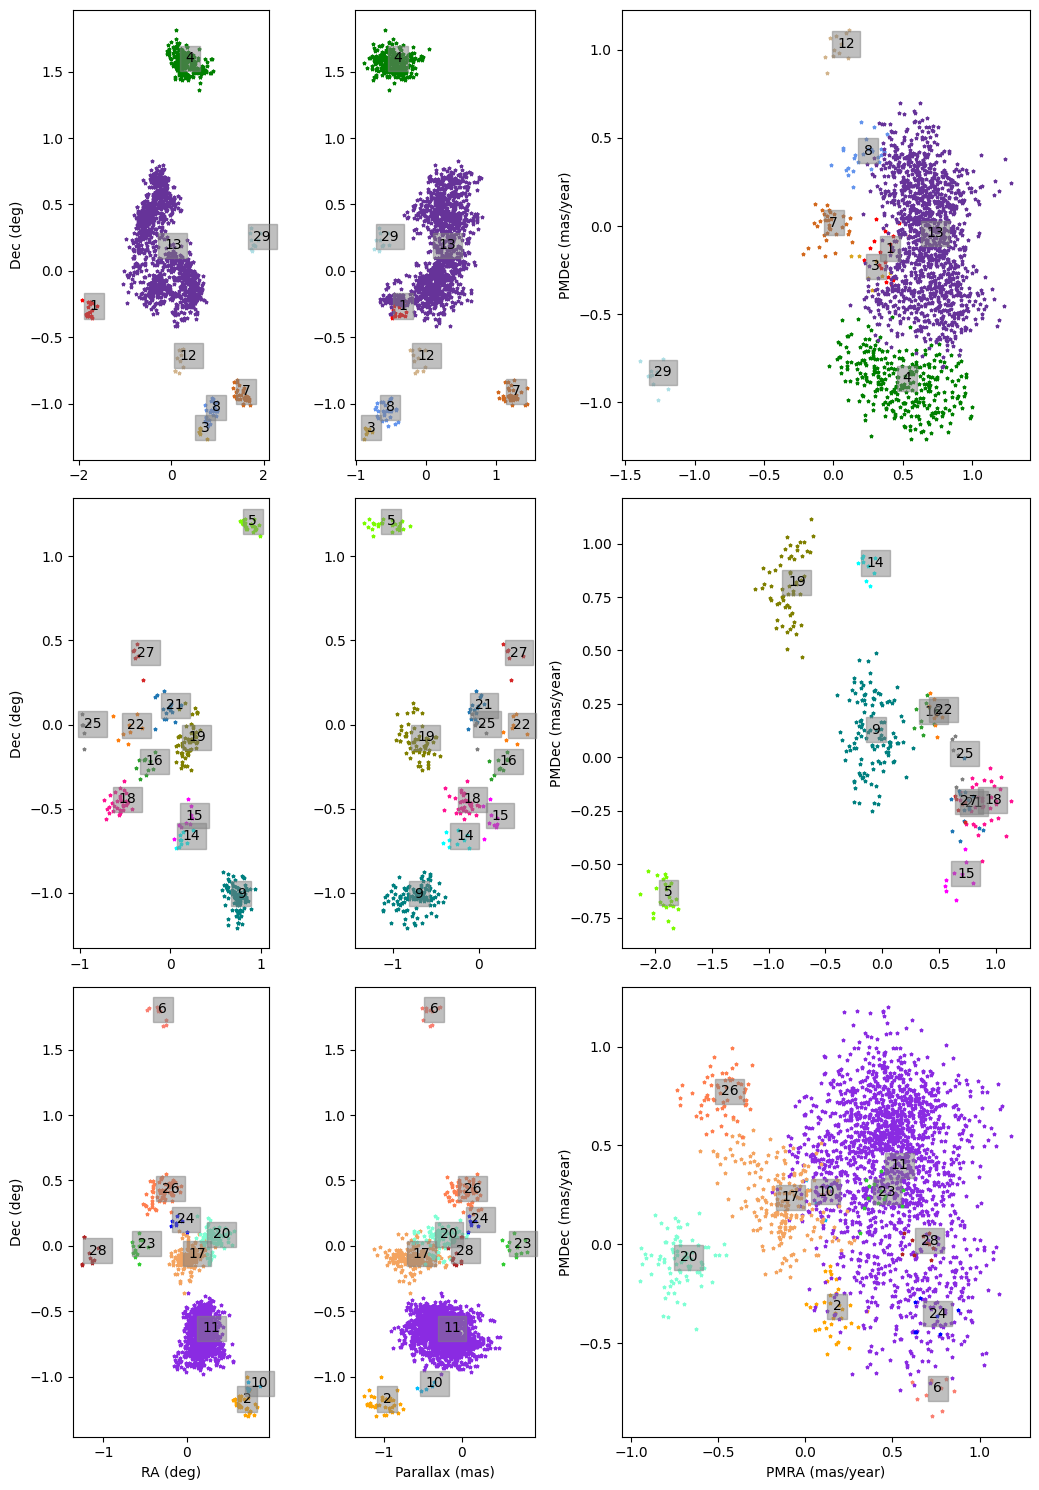

In [240]:
#plt.scatter(model.components_[:, 0], model.components_[:, 1], 5, marker='*')

fig = plt.figure(figsize=(10.5, 15))

gs = gridspec.GridSpec(3, 3, width_ratios=[1.2, 1.1, 2.5]) 
axes = []

lis_1 = [0, 2, 3, 6, 7, 11, 12, 28]
lis_2 = [4, 8, 13, 14, 15, 17, 18, 20, 21, 24, 26]
lis_3 = [1, 5, 9, 10, 16, 19, 22, 23, 25, 27]

colors = ['red', 'orange', 'goldenrod', 'green', 'lawngreen', 'salmon', 'chocolate', 
          'cornflowerblue', 'teal', 'deepskyblue', 'blueviolet', 'tan', 'rebeccapurple', 'cyan', 
          'fuchsia', 'tab:green', 'sandybrown', 'deeppink', 'olive', 'aquamarine', 'tab:blue', 
          'tab:orange', 'limegreen', 'blue', 'tab:grey', 'coral', 'tab:red', 'firebrick', 'powderblue']

for ax in gs:
    axes.append(plt.subplot(ax))

for n in nich:
    core_mask = np.zeros_like(model.labels_, dtype=bool)
    core_mask[model.labels_==n] = True
    
    clumps = X_scaled[core_mask]
    avg_ra = np.mean(clumps[:, 0])
    avg_dec = np.mean(clumps[:, 1])
    avg_parallax = np.mean(clumps[:, 2])
    avg_pmra = np.mean(clumps[:, 3])
    avg_pmdec = np.mean(clumps[:, 4])

    if n in lis_1:
        axes[0].scatter(clumps[:, 0], clumps[:, 1], marker="*", s=5, color=colors[n])
        t1 = axes[0].text(avg_ra, avg_dec, str(n+1), color='k')
        axes[1].scatter(clumps[:, 2], clumps[:, 1], marker="*", s=5, color=colors[n])
        t2 = axes[1].text(avg_parallax, avg_dec, str(n+1), color='k')
        axes[2].scatter(clumps[:, 3], clumps[:, 4], marker="*", s=5, color=colors[n])
        t3 = axes[2].text(avg_pmra, avg_pmdec, str(n+1), color='k')
    elif n in lis_2:
        axes[3].scatter(clumps[:, 0], clumps[:, 1], marker="*", s=5, color=colors[n])
        t1 = axes[3].text(avg_ra, avg_dec, str(n+1), color='k')
        axes[4].scatter(clumps[:, 2], clumps[:, 1], marker="*", s=5, color=colors[n])
        t2 = axes[4].text(avg_parallax, avg_dec, str(n+1), color='k')
        axes[5].scatter(clumps[:, 3], clumps[:, 4], marker="*", s=5, color=colors[n])
        t3 = axes[5].text(avg_pmra, avg_pmdec, str(n+1), color='k')
    elif n in lis_3:
        axes[6].scatter(clumps[:, 0], clumps[:, 1], marker="*", s=5, color=colors[n])
        t1 = axes[6].text(avg_ra, avg_dec, str(n+1), color='k')
        axes[7].scatter(clumps[:, 2], clumps[:, 1], marker="*", s=5, color=colors[n])
        t2 = axes[7].text(avg_parallax, avg_dec, str(n+1), color='k')
        axes[8].scatter(clumps[:, 3], clumps[:, 4], marker="*", s=5, color=colors[n])
        t3 = axes[8].text(avg_pmra, avg_pmdec, str(n+1), color='k')
    if n > -1:
        t1.set_bbox(dict(facecolor='grey', alpha=0.5, edgecolor='grey'))
        t2.set_bbox(dict(facecolor='grey', alpha=0.5, edgecolor='grey'))
        t3.set_bbox(dict(facecolor='grey', alpha=0.5, edgecolor='grey'))

axes[6].set_xlabel('RA (deg)')
axes[7].set_xlabel('Parallax (mas)')
axes[8].set_xlabel('PMRA (mas/year)')

axes[0].set_ylabel('Dec (deg)')
axes[3].set_ylabel('Dec (deg)')
axes[6].set_ylabel('Dec (deg)')

axes[2].set_ylabel('PMDec (mas/year)')
axes[5].set_ylabel('PMDec (mas/year)')
axes[8].set_ylabel('PMDec (mas/year)')

fig.tight_layout()


### The clusters you identified are "statistical overdensities" which may or may not be real open clusters. In order to confirm that these overdensities are indeed open clusters, one will have to look at photometric and/or spectroscopic properties of the stars. We are not going to do this in this homework, but see the following papers if you are interested in.

https://ui.adsabs.harvard.edu/abs/2019A%26A...627A..35C/abstract

https://ui.adsabs.harvard.edu/abs/2020A%26A...640A...1C/abstract

https://ui.adsabs.harvard.edu/abs/2022A%26A...661A.118C/abstract





### 2. PCA and Neural Networks (6 pts)

In this homework problem, we will build a neural network that classifies galaxies based on their SDSS spectra (absorption galaxy, normal galaxy, emission galaxy). Let's first read in SDSS spectra. You can find the data file in the HiPerGator class share folder as well as on Canvas.

In [3]:
import numpy as np

data = np.load('/mnt/c/Users/panda/Documents/hwData/sdss_spectra.npz')
data.files

['wavelengths', 'X', 'y', 'labels', 'z']

The data contains the wavelengths (wavelengths), 3794 spectra (X), classification in integer (y), classification in string (labels), and redshift (z). Let's inspect the data.

In [4]:
data['wavelengths']

array([3162.2776, 3165.1917, 3168.1082, 3171.0273, 3173.9495, 3176.874 ,
       3179.8015, 3182.7314, 3185.6643, 3188.5996, 3191.5378, 3194.4788,
       3197.4224, 3200.3687, 3203.3176, 3206.2693, 3209.2239, 3212.181 ,
       3215.1409, 3218.1035, 3221.0688, 3224.0369, 3227.0076, 3229.9812,
       3232.9575, 3235.9365, 3238.9185, 3241.9028, 3244.8901, 3247.8801,
       3250.873 , 3253.8684, 3256.867 , 3259.868 , 3262.8718, 3265.8784,
       3268.8877, 3271.9   , 3274.9148, 3277.9324, 3280.953 , 3283.976 ,
       3287.0022, 3290.031 , 3293.0627, 3296.0972, 3299.1343, 3302.1743,
       3305.2173, 3308.2627, 3311.3113, 3314.3625, 3317.4165, 3320.4734,
       3323.533 , 3326.5955, 3329.661 , 3332.729 , 3335.8   , 3338.8738,
       3341.9504, 3345.0298, 3348.112 , 3351.1973, 3354.2854, 3357.3762,
       3360.4697, 3363.5664, 3366.6658, 3369.768 , 3372.873 , 3375.981 ,
       3379.0918, 3382.2056, 3385.322 , 3388.4417, 3391.564 , 3394.689 ,
       3397.8171, 3400.948 , 3404.0818, 3407.2185, 

In [5]:
data['wavelengths'].shape

(1000,)

In [6]:
data['X']

array([[ 4.9201283,  5.1662374,  6.073041 , ...,  7.5093303,  7.970523 ,
         7.9843907],
       [ 2.189293 ,  2.1868663,  2.1844583, ..., 12.837092 , 12.934673 ,
        12.810533 ],
       [ 2.7451353,  2.738469 ,  3.368032 , ...,  9.2907915,  9.108875 ,
         8.385379 ],
       ...,
       [ 1.7720324,  2.0300677,  2.2360272, ...,  4.777608 ,  7.0639305,
         5.7977986],
       [ 4.4983783,  5.072573 ,  5.6672626, ..., 21.518795 , 19.828224 ,
        20.714499 ],
       [ 3.9174566,  4.1198335,  5.0055575, ..., 14.062734 , 16.002117 ,
        15.691873 ]], dtype=float32)

In [7]:
data['X'].shape

(3794, 1000)

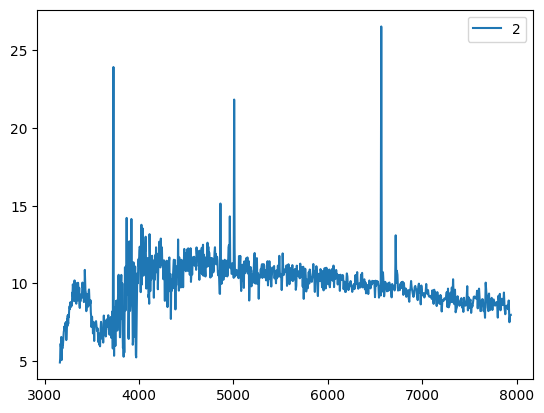

In [8]:
spec = 0
plt.plot(data['wavelengths'], data['X'][spec], label=data['y'][spec])
plt.legend()

In [9]:
data['y']

array([2, 1, 1, ..., 2, 0, 2], dtype=int32)

In [10]:
np.unique(data['y'])

array([0, 1, 2], dtype=int32)

In [11]:
data['labels']

array(['absorption galaxy', 'galaxy', 'emission galaxy'], dtype='<U17')

In [12]:
data['z']

array([0.00632467, 0.204065  , 0.133729  , ..., 0.0730738 , 0.108268  ,
       0.107631  ], dtype=float32)

Let's standardize the data and make a plot showing the averaged spectrum of each class.

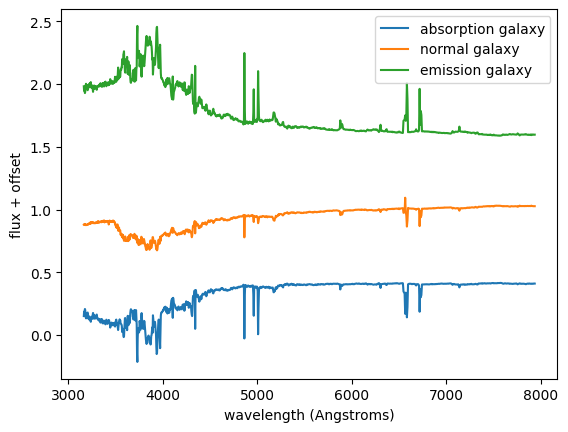

In [13]:
from sklearn.preprocessing import StandardScaler

X = data['X']
y = data['y']
Xs = StandardScaler().fit_transform(X)

plt.plot(data['wavelengths'], np.mean(Xs[y == 0,:],axis=0), label='absorption galaxy')
plt.plot(data['wavelengths'], np.mean(Xs[y == 1,:],axis=0)+1, label='normal galaxy')
plt.plot(data['wavelengths'], np.mean(Xs[y == 2,:],axis=0)+2, label='emission galaxy')
plt.xlabel('wavelength (Angstroms)')
plt.ylabel('flux + offset')
plt.legend()

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler

X_train_scaled = StandardScaler().fit(X_train).transform(X_train)
X_test_scaled = StandardScaler().fit(X_train).transform(X_test)

In [78]:
X_scaled = StandardScaler().fit_transform(X)

(a) Now that we have inspected the data, let's build a neural network. Using ```tensorflow.keras```, build a neural network that has two hidden layers each of which has 1,000 neurons. It's always a good practice to check the model summary. Compile the model using loss="sparse_categorical_crossentropy", Adam optimizer, and learning rate = 1.0e-3. Then, train the model for 100 epochs. Record the time it took for training. (1 pt)

In [16]:
import tensorflow.keras as keras

2023-03-16 10:08:29.592043: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-16 10:08:30.133021: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-03-16 10:08:30.245028: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-16 10:08:30.245048: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [79]:
# Initialize a model.
model = keras.models.Sequential()

# Add the input layer and specifying its shape.
model.add(keras.layers.Input(shape=X_scaled.shape[1]))

# Add the first hidden layer with 1000 neurons and the ReLU activation function.
model.add(keras.layers.Dense(1000, activation='relu'))

# Add the second hidden layer with 1000 neurons and the ReLU activation function.
model.add(keras.layers.Dense(1000, activation='relu'))

# Add the output layer
# softmax normalizes the output to a probability distribution
model.add(keras.layers.Dense(np.unique(y).shape[0], activation='softmax'))

In [80]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_16 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_17 (Dense)            (None, 3)                 3003      
                                                                 
Total params: 2,005,003
Trainable params: 2,005,003
Non-trainable params: 0
_________________________________________________________________


In [81]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics='accuracy')

In [82]:
tstart = time.time()
history = model.fit(X_scaled, y, epochs=100, validation_split=0.2)
tstop = time.time()-tstart
print("Elapsed Time for Training: {:.3f}".format(tstop) + " seconds")

Epoch 1/100
95/95 [==============================] - 2s 19ms/step - loss: 0.9523 - accuracy: 0.6432 - val_loss: 0.6530 - val_accuracy: 0.6522
Epoch 2/100
95/95 [==============================] - 2s 18ms/step - loss: 0.6574 - accuracy: 0.7041 - val_loss: 0.7764 - val_accuracy: 0.6495
Epoch 3/100
95/95 [==============================] - 2s 17ms/step - loss: 0.6912 - accuracy: 0.6952 - val_loss: 0.6160 - val_accuracy: 0.6693
Epoch 4/100
95/95 [==============================] - 2s 16ms/step - loss: 0.5858 - accuracy: 0.7245 - val_loss: 0.5829 - val_accuracy: 0.6943
Epoch 5/100
95/95 [==============================] - 2s 18ms/step - loss: 0.6194 - accuracy: 0.7170 - val_loss: 0.6385 - val_accuracy: 0.6601
Epoch 6/100
95/95 [==============================] - 2s 17ms/step - loss: 0.6342 - accuracy: 0.7038 - val_loss: 0.5770 - val_accuracy: 0.6877
Epoch 7/100
95/95 [==============================] - 2s 17ms/step - loss: 0.5440 - accuracy: 0.7397 - val_loss: 0.5734 - val_accuracy: 0.6983
Epoch 

In [83]:
print("Elapsed Time for Training: {:.3f}".format(tstop) + " seconds")

Elapsed Time for Training: 173.595 seconds


(b) Make plots showing training loss, validation loss, training accuracy, validation accuray. (1 pt)

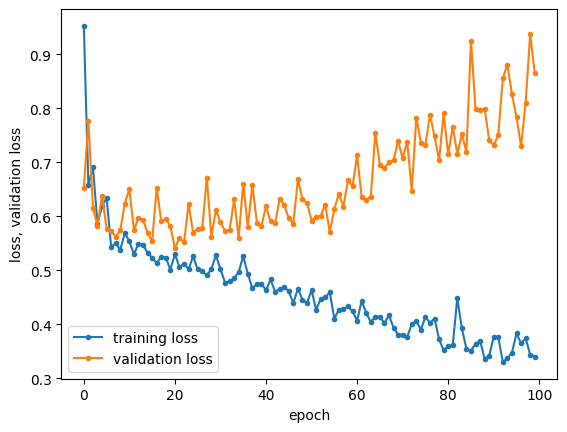

In [84]:
plt.plot(history.epoch, history.history['loss'],'.-', label='training loss')
plt.plot(history.epoch, history.history['val_loss'],'.-', label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')
plt.legend()

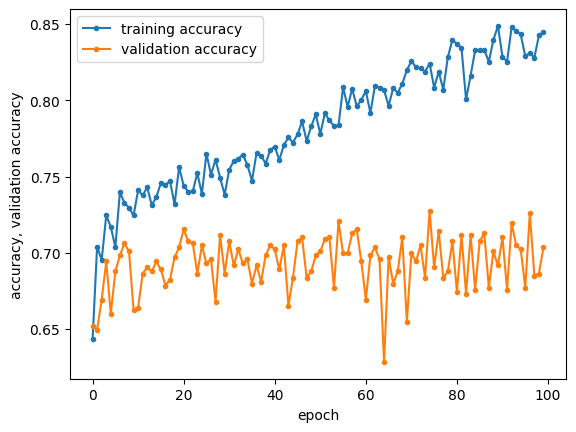

In [85]:
plt.plot(history.epoch, history.history['accuracy'],'.-', label='training accuracy')
plt.plot(history.epoch, history.history['val_accuracy'],'.-', label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')
plt.legend()

(c) The original data lives in a 1,000 dimensional space. Let's reduce the dimension using PCA. Choose the number of PCs such that you preserve 99% of the variance in the original data. How many dimensions did you end up with? (1 pt)

In [60]:
# 1000 wavelength resolution
# decrease dimensions with PCA to remove uninteresting regions of spectra
# focus on the more interesting areas

# Apply PCA, keep 99% variance
pca = PCA(n_components=0.99)

# This is the data in the "new" low-dimensional feature space.
X_pca = pca.fit_transform(X_scaled)
#X_pca = pca.transform(X_scaled)
X_inverse = pca.inverse_transform(X_pca)

In [61]:
pca.n_components, pca.n_components_ # WOW that reduced the dimensions a lot

(0.99, 4)

In [71]:
X_scaled.shape # before PCA

(3794, 1000)

In [72]:
X_pca.shape # after PCA

(3794, 4)

(d) Make a plot showing the averaged inverse transformed spectrum of each class. How do they compare with the plot you made earlier? (1 pt)

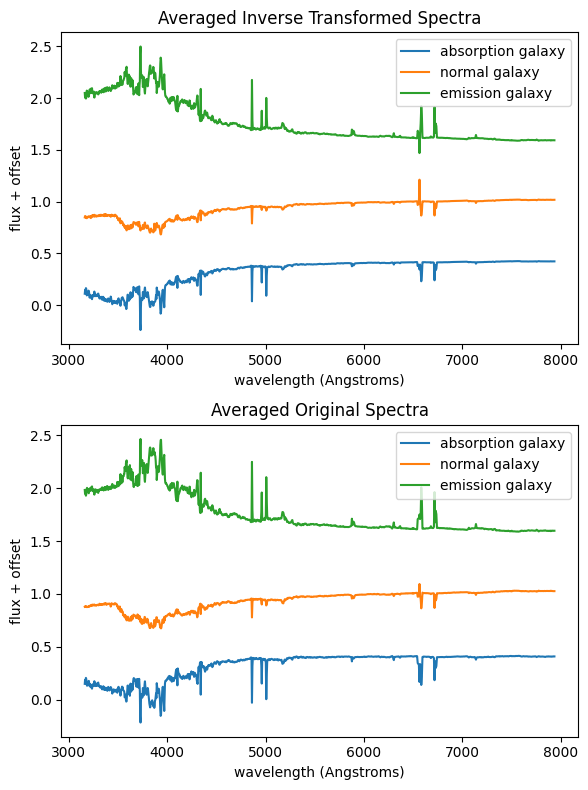

In [62]:
# try to use reverse transform to remake spectrum plots

fig, axes = plt.subplots(2, figsize=(6,8))

from sklearn.preprocessing import StandardScaler

X = data['X']
y = data['y']
Xs = StandardScaler().fit_transform(X)

X_pca = pca.transform(X)
X_inverse = pca.inverse_transform(Xs_pca)

axes[0].plot(data['wavelengths'], np.mean(X_inverse[y == 0,:], axis=0), label='absorption galaxy')
axes[0].plot(data['wavelengths'], np.mean(X_inverse[y == 1,:], axis=0)+1, label='normal galaxy')
axes[0].plot(data['wavelengths'], np.mean(X_inverse[y == 2,:], axis=0)+2, label='emission galaxy')
axes[0].set_xlabel('wavelength (Angstroms)')
axes[0].set_ylabel('flux + offset')
axes[0].legend()
axes[0].set_title('Averaged Inverse Transformed Spectra')

axes[1].plot(data['wavelengths'], np.mean(Xs[y == 0,:], axis=0), label='absorption galaxy')
axes[1].plot(data['wavelengths'], np.mean(Xs[y == 1,:], axis=0)+1, label='normal galaxy')
axes[1].plot(data['wavelengths'], np.mean(Xs[y == 2,:], axis=0)+2, label='emission galaxy')
axes[1].set_xlabel('wavelength (Angstroms)')
axes[1].set_ylabel('flux + offset')
axes[1].legend()
axes[1].set_title('Averaged Original Spectra')

fig.tight_layout()


These spectra are very similar!

(e) Build a new neural network, using the same architecture, optimizer, learning rate, number of epochs as in (a), and train it. How does the number of trainable parameters compare? How does the training time compare? Do you see the benefit of PCA? (1 pt)

In [64]:
# see how long it takes relative to previous
# Initialize a model.
model_pca = keras.models.Sequential()

# Add the input layer and specifying its shape.
model_pca.add(keras.layers.Input(shape=X_pca.shape[1]))

# Add the first hidden layer with 1000 neurons and the ReLU activation function.
model_pca.add(keras.layers.Dense(1000, activation='relu'))

# Add the second hidden layer with 1000 neurons and the ReLU activation function.
model_pca.add(keras.layers.Dense(1000, activation='relu'))

# Add the output layer
# softmax normalizes the output to a probability distribution
model_pca.add(keras.layers.Dense(np.unique(y).shape[0], activation='softmax'))



In [66]:
model_pca.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1000)              5000      
                                                                 
 dense_10 (Dense)            (None, 1000)              1001000   
                                                                 
 dense_11 (Dense)            (None, 3)                 3003      
                                                                 
Total params: 1,009,003
Trainable params: 1,009,003
Non-trainable params: 0
_________________________________________________________________


In [67]:
model_pca.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.Adam(learning_rate=1e-3),
              metrics='accuracy')

In [73]:
tstart = time.time()
history_pca = model_pca.fit(X_pca, y, epochs=100, validation_split=0.2)
tstop = time.time()-tstart

Epoch 1/100
95/95 [==============================] - 1s 10ms/step - loss: 12.0916 - accuracy: 0.5717 - val_loss: 0.9313 - val_accuracy: 0.6588
Epoch 2/100
95/95 [==============================] - 1s 9ms/step - loss: 3.2530 - accuracy: 0.5960 - val_loss: 0.7965 - val_accuracy: 0.6877
Epoch 3/100
95/95 [==============================] - 1s 8ms/step - loss: 1.2008 - accuracy: 0.6448 - val_loss: 1.4596 - val_accuracy: 0.6561
Epoch 4/100
95/95 [==============================] - 1s 8ms/step - loss: 1.8999 - accuracy: 0.6339 - val_loss: 1.1548 - val_accuracy: 0.6653
Epoch 5/100
95/95 [==============================] - 1s 10ms/step - loss: 1.1163 - accuracy: 0.6488 - val_loss: 1.4924 - val_accuracy: 0.6693
Epoch 6/100
95/95 [==============================] - 1s 10ms/step - loss: 1.0816 - accuracy: 0.6382 - val_loss: 1.6075 - val_accuracy: 0.6522
Epoch 7/100
95/95 [==============================] - 1s 10ms/step - loss: 1.1185 - accuracy: 0.6379 - val_loss: 0.6677 - val_accuracy: 0.6522
Epoch 8/

In [74]:
print("Elapsed Time for Training: {:.3f}".format(tstop) + " seconds")

Elapsed Time for Training: 85.491 seconds


1. How does the number of trainable parameters compare? 

With PCA, there are 1,009,003 trainable parameters, compared to about twice as many without PCA at 2,005,003 trainable parameters. 

2. How does the training time compare? 

The training time using PCA is much lower than without.

3. Do you see the benefit of PCA?

Yes! The benefit of PCA is that there are less parameters to train, meaning that the training takes a much shorter time. Time on super computers is money, so using PCA is very advantageous. 

(f) Make plots showing training loss, validation loss, training accuracy, validation accuray, similar to (b). Did you get a comparable accucary? (1 pt)

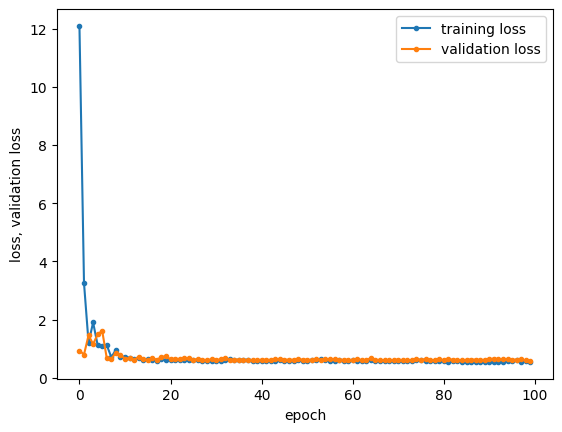

In [76]:
# compute the accuracy before and after PCA 

plt.plot(history_pca.epoch, history_pca.history['loss'],'.-', label='training loss')
plt.plot(history_pca.epoch, history_pca.history['val_loss'],'.-', label='validation loss')
plt.xlabel('epoch')
plt.ylabel('loss, validation loss')
plt.legend()

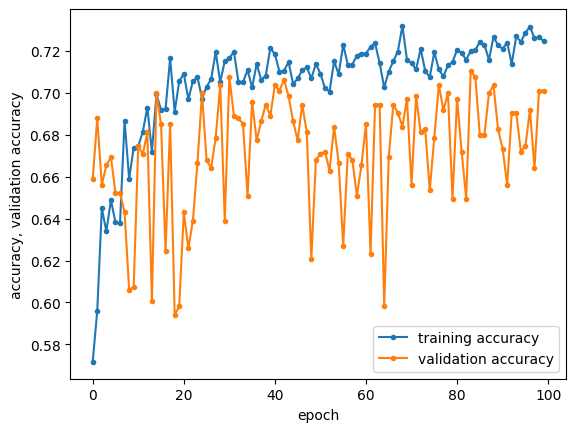

In [77]:
plt.plot(history_pca.epoch, history_pca.history['accuracy'],'.-', label='training accuracy')
plt.plot(history_pca.epoch, history_pca.history['val_accuracy'],'.-', label='validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy, validation accuracy')
plt.legend()

The validation accuracy is about the same, but the training accuracy between the two is different.